# Hotel Ranking Model Development
This notebook demonstrates the process of building a hotel ranking model using a synthetic dataset. We will:
1. Generate the dataset.
2. Preprocess the data.
3. Perform feature engineering.
4. Train the model using a Gradient Boosting Regressor.
5. Evaluate the model's performance.


In [5]:
import sys
import os

# Move one level up from 'notebooks' to the root directory, then point to 'src'
src_path = os.path.abspath('../src')

# Ensure the 'src' directory is added to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Print sys.path to verify that the path is correctly added
print("Current sys.path:")
print(src_path)


Current sys.path:
/Users/santiago/Documents/repos/resortpass-hotel-ranking/src


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from data_preprocessing import load_data, preprocess_data
from feature_engineering import feature_engineering
from model import train_model, evaluate_model
from evaluate import visualize_top_10_hotels
from sklearn.model_selection import train_test_split

In [7]:
# Step 1: Load and preprocess the data
df = load_data()
df = preprocess_data(df)
df.head()

,Hotel_ID,Price,Category,Location_Proximity,Review_Score,Amenities,Search_Count,CTR,Bookings,Time_Spent,Review_Text
0,H0001,-0.030277,Budget,-0.042309,-1.372491,"[1, 1, 1, 1, 0]",1.358261,-1.123207,1.223279,0.683514,Hotel 1 is a great choice for your stay. Decen...
1,H0002,1.286485,Economy,-0.588075,-0.225792,"[1, 0, 0, 1, 0]",0.845148,1.096038,-1.263131,0.489178,Hotel 2 is a great choice for your stay. Decen...
2,H0003,1.087238,Budget,-1.468377,-0.336615,"[1, 0, 1, 0, 0]",-0.668349,0.265099,-0.496294,-0.095100,Hotel 3 is a great choice for your stay. Comfo...
3,H0004,-0.740635,Economy,0.352403,-1.389005,"[0, 0, 1, 1, 1]",-0.808625,-1.189442,-0.263920,-0.934451,Hotel 4 is a great choice for your stay. Comfo...
4,H0005,-1.329713,Economy,1.254743,-0.994014,"[0, 1, 1, 0, 0]",-0.018653,-1.211381,1.688028,-0.275463,Hotel 5 is a great choice for your stay. Good ...


In [8]:
# Step 2: Feature Engineering
df = feature_engineering(df)
df.head()

,Hotel_ID,Price,Location_Proximity,Review_Score,Search_Count,CTR,Bookings,Time_Spent,Category_Economy,Category_Luxury,...,text_feature_46,text_feature_47,text_feature_48,text_feature_49,text_feature_50,amenity_1,amenity_2,amenity_3,amenity_4,amenity_5
0,H0001,-0.030277,-0.042309,-1.372491,1.358261,-1.123207,1.223279,0.683514,False,False,...,0.000013,-0.000355,0.000124,-0.000114,-0.000265,1,1,1,1,0
1,H0002,1.286485,-0.588075,-0.225792,0.845148,1.096038,-1.263131,0.489178,True,False,...,0.000013,-0.000355,0.000124,-0.000114,-0.000265,1,0,0,1,0
2,H0003,1.087238,-1.468377,-0.336615,-0.668349,0.265099,-0.496294,-0.095100,False,False,...,-0.000114,-0.000220,0.000168,0.000294,0.000462,1,0,1,0,0
3,H0004,-0.740635,0.352403,-1.389005,-0.808625,-1.189442,-0.263920,-0.934451,True,False,...,-0.000114,-0.000220,0.000168,0.000294,0.000462,0,0,1,1,1
4,H0005,-1.329713,1.254743,-0.994014,-0.018653,-1.211381,1.688028,-0.275463,True,False,...,0.000118,0.000032,-0.000171,-0.000055,-0.000214,0,1,1,0,0


In [9]:
# Step 3: Define Features and Target + Train-Test Split
X = df.drop(columns=['Hotel_ID', 'Bookings'])
y = df['Bookings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 64), (200, 64), (800,), (200,))

In [11]:
# Step 4: Train the model
model = train_model(X_train, y_train)

In [12]:
model

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [13]:
# Step 5: Evaluate the model
mse, y_pred = evaluate_model(model, X_test, y_test)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.031925680196483


/Users/santiago/Documents/repos/resortpass-hotel-ranking/src/evaluate.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Bookings', y='Hotel_ID', data=top_10, palette='viridis')


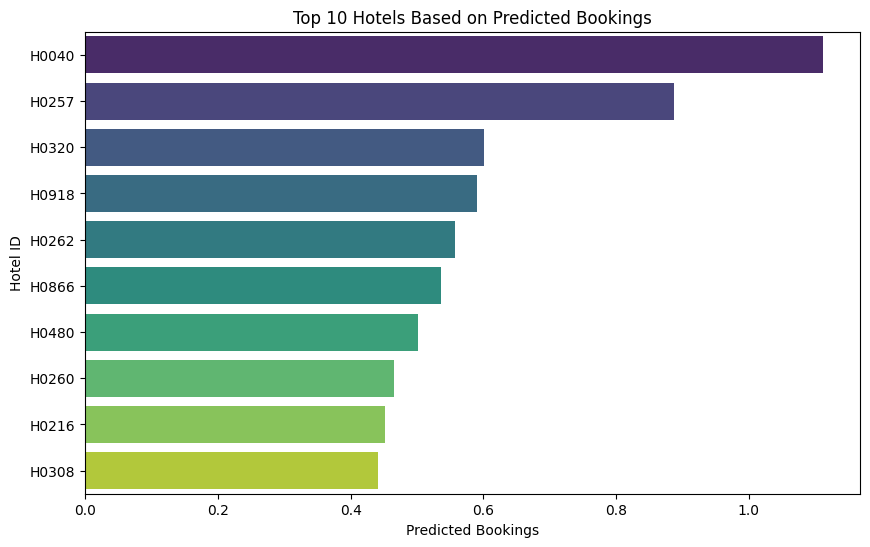

In [14]:
# Step 6: Visualize top 10 hotels based on predicted bookings
predictions = pd.DataFrame({'Hotel_ID': df['Hotel_ID'].iloc[X_test.index], 'Predicted_Bookings': y_pred})
visualize_top_10_hotels(predictions)
